<a href="https://colab.research.google.com/github/xiaolin5167/Github-Colab-Pytorch/blob/main/04_have_fun_with_stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Diffusers
https://huggingface.co/docs/diffusers/installation

**please make sure that you have connected to GPU**

Runtime->change runtime type->choise a gpu

In [1]:
!pip install -q diffusers["torch"] transformers
!pip install -q accelerate
!pip install -q git+https://github.com/huggingface/diffusers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


#1.text-image
https://huggingface.co/digiplay/majicMIX_realistic_v6

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

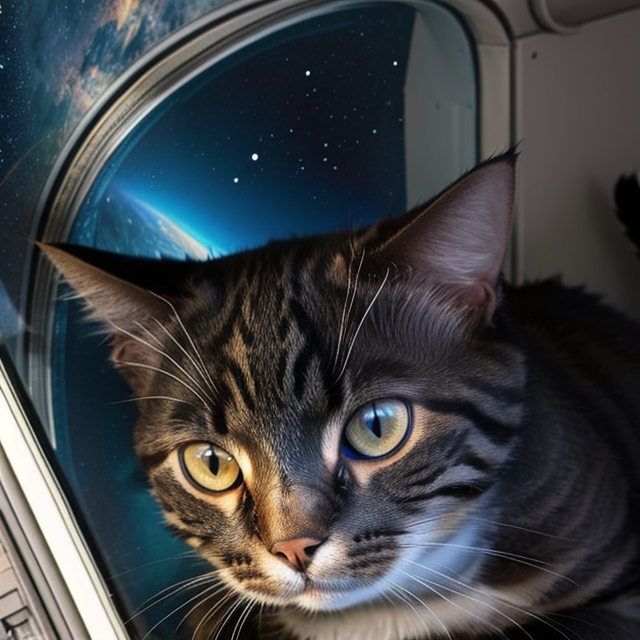

In [12]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("digiplay/majicMIX_realistic_v6", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a cat in space"
h = 640
w = 640
steps = 50
negs = "bad anatomy, bad hands, three ears，three hands, three legs, bad arms, missing legs, missing arms, poorly drawn face, bad face, fused face, cloned face, worst face, three crus, extra crus, fused crus, worst feet, three feet, fused feet, fused thigh, three thigh, fused thigh, extra thigh, worst thigh, missing fingers, extra fingers, ugly fingers, long fingers, horn, realistic photo, extra eyes, huge eyes, 2girl, amputation, disconnected limbs"

image = pipe(prompt, height=h, width=w, num_inference_steps = steps, negative_prompt = negs).images[0]
image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

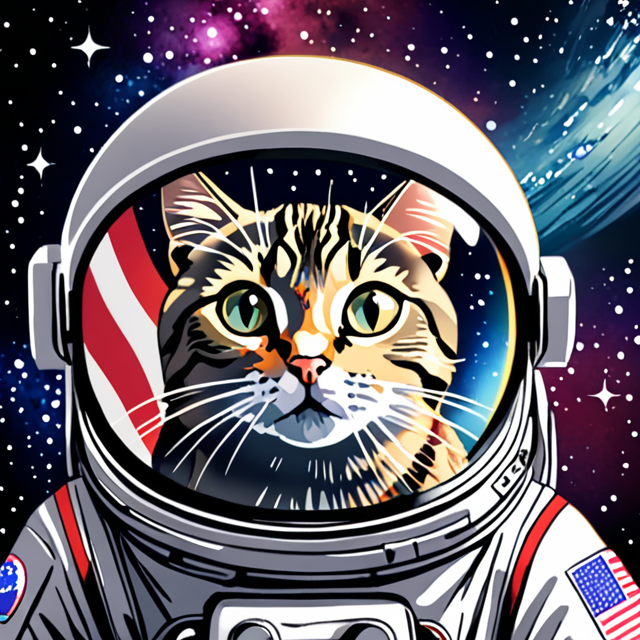

In [11]:
from diffusers import AutoPipelineForText2Image, EulerAncestralDiscreteScheduler
import torch

pipe = AutoPipelineForText2Image.from_pretrained('Lykon/AAM_XL_AnimeMix_Turbo', torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = "a cat in space"
h = 640
w = 640
steps = 50
negs = "bad anatomy, bad hands, three hands, three legs, bad arms, missing legs, missing arms, poorly drawn face, bad face, fused face, cloned face, worst face, three crus, extra crus, fused crus, worst feet, three feet, fused feet, fused thigh, three thigh, fused thigh, extra thigh, worst thigh, missing fingers, extra fingers, ugly fingers, long fingers, horn, realistic photo, extra eyes, huge eyes, 2girl, amputation, disconnected limbs"

image = pipe(prompt, height=h, width=w, num_inference_steps = steps, negative_prompt = negs).images[0]
image

#2.image-image

In [4]:
!wget "https://pic3.zhimg.com/80/v2-92518d1334fb1a51cbd59afa4ad60c62_720w.webp"
!cp "v2-92518d1334fb1a51cbd59afa4ad60c62_720w.webp" image1.jpg
!rm "v2-92518d1334fb1a51cbd59afa4ad60c62_720w.webp"

--2024-02-23 15:08:31--  https://pic3.zhimg.com/80/v2-92518d1334fb1a51cbd59afa4ad60c62_720w.webp
Resolving pic3.zhimg.com (pic3.zhimg.com)... 43.132.81.100, 101.33.26.190, 101.33.26.198, ...
Connecting to pic3.zhimg.com (pic3.zhimg.com)|43.132.81.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40278 (39K) [image/webp]
Saving to: ‘v2-92518d1334fb1a51cbd59afa4ad60c62_720w.webp’

v2-92518d1334fb1a51 100%[===================>]  39.33K  --.-KB/s    in 0.004s  

2024-02-23 15:08:31 (9.30 MB/s) - ‘v2-92518d1334fb1a51cbd59afa4ad60c62_720w.webp’ saved [40278/40278]



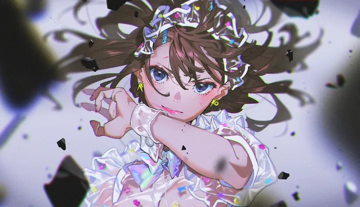

In [5]:
from PIL import Image
image_path="image1.jpg"
init_image = Image.open(image_path)
scaled_image  = init_image.resize((int(init_image.width * 0.5), int(init_image.height * 0.5)))
scaled_image

  0%|          | 0/25 [00:00<?, ?it/s]

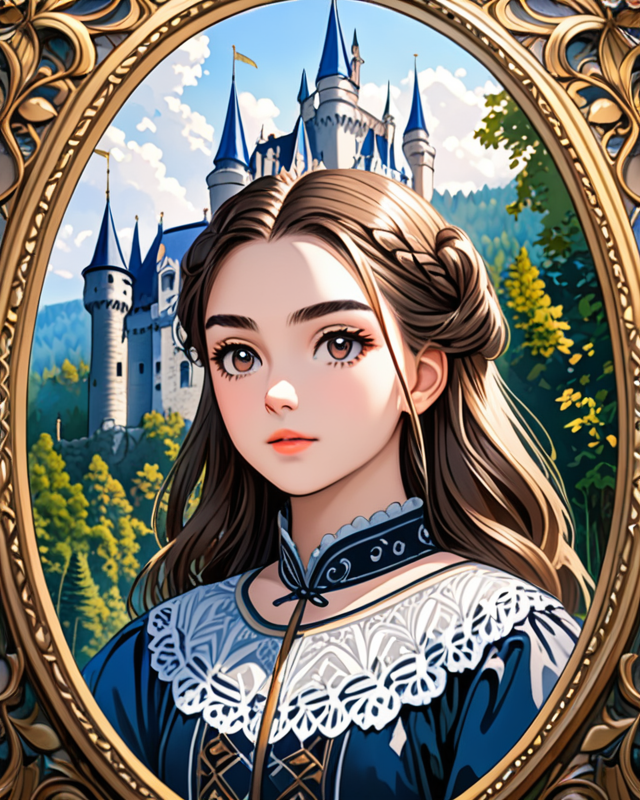

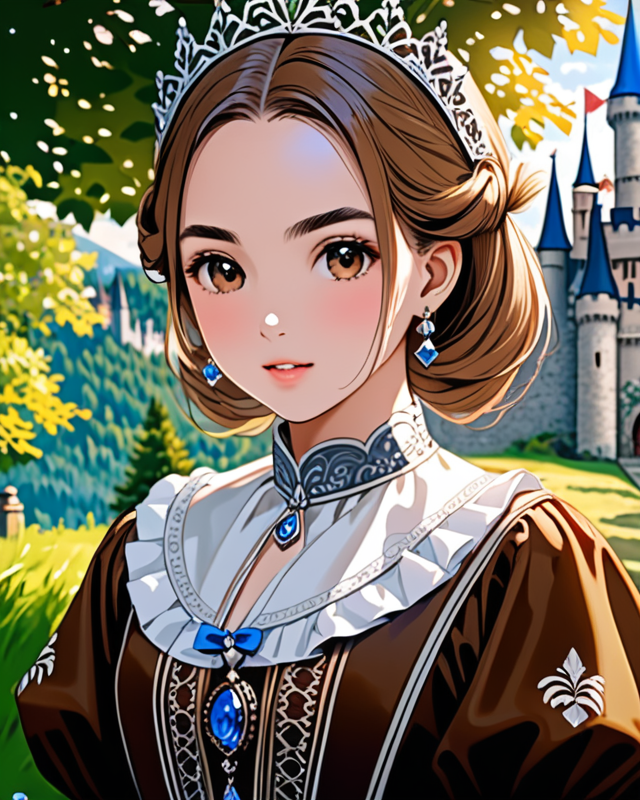

In [9]:
prompt = "a girl with brow hair before a castle in the forest, masterpiece, ultradetailed"
h=800
w=640
steps=25
guidance=7
lora_weight=0
num_images=2
denoising_strength=0.4
neg = "bad anatomy, bad hands, three hands, three legs, bad arms, missing legs, missing arms, poorly drawn face, bad face, fused face, cloned face, worst face, three crus, extra crus, fused crus, worst feet, three feet, fused feet, fused thigh, three thigh, fused thigh, extra thigh, worst thigh, missing fingers, extra fingers, ugly fingers, long fingers, horn, realistic photo, extra eyes, huge eyes, 2girl, amputation, disconnected limbs"

images = pipe(prompt, image=init_image, strength=denoising_strength, num_images_per_prompt=num_images, cross_attention_kwargs={"scale": lora_weight}, height=h, width=w, num_inference_steps=steps, guidance_scale=guidance, negative_prompt=neg).images
for i in range(num_images):
  display(images[i])